In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
sales=pd.read_csv("Add_sales_data_2018.csv")

In [64]:
sales.describe

<bound method NDFrame.describe of            Date  Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0    2018-10-08              208.00              222.25              206.85   
1    2018-10-05              217.00              218.60              205.90   
2    2018-10-04              223.50              227.80              216.15   
3    2018-10-03              230.00              237.50              225.75   
4    2018-10-01              234.55              234.60              221.05   
..          ...                 ...                 ...                 ...   
200  2017-12-14              288.00              288.25              279.20   
201  2017-12-13              290.00              292.50              282.20   
202  2017-12-12              298.60              298.60              286.65   
203  2017-12-11              290.00              299.55              285.90   
204  2017-12-08              287.55              289.90              285.05   

     Add4(in Thou

In [65]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [66]:
sales.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

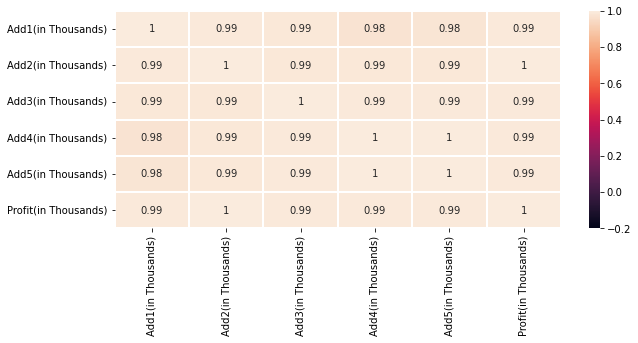

In [67]:
corrmatrix=sales.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=1,annot=True,linewidth=0.2)

The output shows strong high correlation between the variables and the output

add4 and add5 highly correlated,so we delete one of the columns

In [68]:
sales1=sales.drop(['Add4(in Thousands)'],axis=1)

In [69]:
sales1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [70]:
x=sales1[['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)']]
y=sales1['Profit(in Thousands)']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [73]:
x_test.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
15,216.35,223.70,212.65,222.65
9,233.55,239.20,230.75,233.30
100,280.00,281.35,251.85,255.90
132,258.05,263.50,253.70,262.20
68,265.10,268.40,261.20,265.60


In [74]:
x_train.shape

(164, 4)

In [75]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [76]:
print(predictions)

[4153.27545349 4445.73004619 5130.52882637 4906.51003111 5006.83829552
 4623.3730661  5384.61181823 5328.12178883 5174.25834283 5956.19250176
 5780.69521274 4998.64258624 5075.7581675  5783.18604238 4936.51119211
 5065.32351051 4190.86616915 5034.92724764 5013.76045633 5134.50334278
 5145.26772667 5422.50254931 4569.03526175 4597.94049005 4436.70490492
 4175.24282289 5616.25454411 5667.28466418 4648.94589473 5717.8495839
 5000.54215905 5182.27940317 5017.71485201 5545.29847919 5013.73982034
 5033.29657638 5108.67989299 4760.08423647 4604.89118199 4925.5997048
 5252.38632566]


In [77]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [78]:
from sklearn.metrics import mean_squared_error
print('MSE is ',mean_squared_error(y_test,predictions))

MSE is  0.8506975615641083


linear regression model with low MSE

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320


In [90]:
x = sales[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = sales['Profit(in Thousands)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
new_input = [[290,312,309,298,320]]
# get prediction for new input
new_output = model.predict(new_input)

print(new_output)

[5820.06]


In [91]:
new_output

array([5820.06])

company will get 5820 profit by spending these amount on  advertisement